### Student Activity: Archery Target Hits

This program executes `1000` simulations of an archer shooting at a target `5` times. The archer is a beginner who has a `20%` chance of hitting the target. Results are then saved to a DataFrame to calculate the frequency distribution and corresponding probability distribution of made shots to determine its `95%` confidence interval of predicted values.

In [1]:
# Import libraries and dependencies
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
%matplotlib inline

### Perform the Monte Carlo Simulation and Create Pandas DataFrame From Results

In [2]:
# Set number of simulations and shots
num_simulations = 1000
num_shots = 5

# Set a list object acting as a shot: hit or miss
shot = ["hit", "missed"]

# Set probability of events
probability = [0.2, 0.8]

# Create an empty DataFrame to hold simulation results
monte_carlo = pd.DataFrame()

# Run n number of simulations
for n in range(num_simulations):

    # Print simulation iteration
    # print(f"Running Simulation {n+1}...")
    
    # Set an empty list to hold shot results
    shots = []

    # Shoot arrows `5` times
    for i in range(num_shots):
        
        # Randomly choose between `hit` and `miss` with a `20%` chance to
        # hit the target and a `80%` chance to miss the target
        result = random.choice(shot, p=probability)
        
        # Print shot result
        # print(f"  Shot {i+1}: {result}")

        # Append shot result to list
        shots.append(result)

    # Append column for each simulation and shot results
    monte_carlo[f"Simulation {n}"] = pd.Series(shots)

# Print the DataFrame
monte_carlo

,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
0,missed,missed,missed,missed,missed,missed,hit,missed,missed,missed,...,missed,missed,hit,missed,missed,missed,missed,missed,missed,missed
1,missed,missed,missed,missed,missed,missed,missed,missed,missed,missed,...,missed,hit,missed,missed,missed,missed,missed,hit,missed,hit
2,missed,missed,missed,missed,missed,missed,missed,missed,missed,missed,...,hit,hit,missed,missed,missed,missed,missed,missed,missed,missed
3,hit,hit,missed,missed,missed,hit,missed,missed,hit,missed,...,hit,hit,missed,missed,missed,missed,missed,missed,hit,missed
4,missed,missed,hit,missed,hit,hit,missed,missed,missed,missed,...,missed,hit,missed,missed,missed,missed,missed,missed,missed,missed


### Calculate Total Number of Hits for Each Simulation

In [3]:
# Set empty DataFrame to hold frequency distribution values
freq_dist_df = pd.DataFrame()

# Set empty lists to hold heads and tails results per simulation
hit_target = []
missed_target = []

# Loop through the results of every simulation
for col in monte_carlo.columns:
    
    # Use the `value_counts` function to calculate the frequency distribution 
    # of hit-to-missed targets for every simulation, returns Series object
    value_count = monte_carlo[col].value_counts()
    
    # Append results of hit and missed targets to respective lists
    # If `hit` and `missed key is present in the Series, append both results
    if 'hit' in value_count.index and 'missed' in value_count.index:
        hit_target.append(value_count['hit'])
        missed_target.append(value_count['missed'])
        
    # If `hit` key is not present in the Series, append hit target list with 0
    # And append missed target list with missed result (simulation must have returned all missed targets)
    elif 'hit' not in value_count.index:
        hit_target.append(0)
        missed_target.append(value_count['missed'])
        
    # If `missed` key is not present in the Series, append tails list with 0
    # And append hit target list with hit result (simulation must have returned all hit targets)
    elif 'missed' not in value_count.index:
        missed_target.append(0)
        hit_target.append(value_count['hit'])
        
# Create columns from heads and tails lists
freq_dist_df['hit_targets'] = hit_target
freq_dist_df['missed_targets'] = missed_target
freq_dist_df.head()

,hit_targets,missed_targets
0,1,4
1,1,4
2,1,4
3,0,5
4,1,4


### Plot Frequency Distribution of Hits for 1000 Simulations of 5 Shots

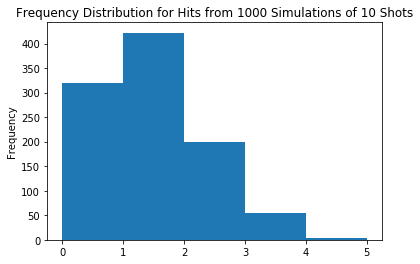

In [4]:
# Plot the data as a histogram and manually set the bin ranges
plot_title = f"Frequency Distribution for Hits from {num_simulations} Simulations of 10 Shots"
freq_dist_df['hit_targets'].plot(kind='hist', title=plot_title, bins=[0, 1, 2, 3, 4, 5])

### Plot Probability Distribution of Hits for 1000 Simulations of 5 Shots

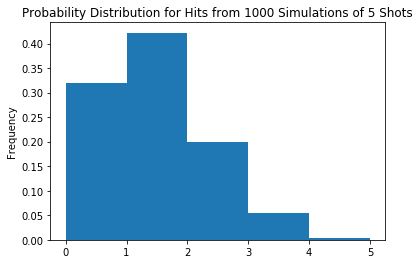

In [5]:
# Plot the data as a histogram with probabilities of 
plot_title = f"Probability Distribution for Hits from {num_simulations} Simulations of 5 Shots"
freq_dist_df['hit_targets'].plot.hist(density=True, title=plot_title, bins=[0, 1, 2, 3, 4, 5])

### Create a `95%` Confidence Interval via Quantile Range

In [6]:
# Set the 2.5 and 97.5 quantiles/percentiles of the frequency distribution
confidence_interval = freq_dist_df['hit_targets'].quantile(q=[0.025, 0.9750])
confidence_interval

0.025    0.0
0.975    3.0
Name: hit_targets, dtype: float64

### Plot Lower and Upper Bounds of `95%` Confidence Interval on Probability Distribution

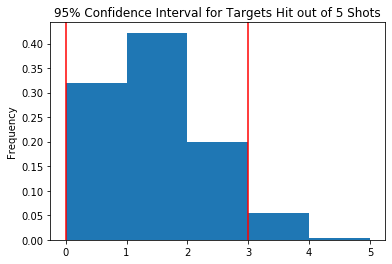

In [7]:
# Set boundaries for lower and upper bound of `95%` confidence interval
# Set boundary lines to red
plt.figure()
freq_dist_df['hit_targets'].plot(kind='hist', density=True, bins=[0,1,2,3,4,5], title="95% Confidence Interval for Targets Hit out of 5 Shots")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

### What does the `95%` Confidence Interval Mean in this Case?

There is a 95% chance that the archer will hit the target `0-3` times out of `5` shots.